##### Sergio Duque Mejía, c.c 1036654435
##### Mail: sergio.duquem@udea.edu.co

# Homework - perform multiple linear regression on the
`FuelConsumption.csv data`
* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [187]:
import pandas as pd # import and manipulation of the data
import numpy as np # math
import matplotlib.pyplot as plt # graphs
from sklearn.linear_model import LinearRegression # linear model 

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [188]:
data = pd.read_csv("FuelConsumption.csv") # import the data
data.head(3) # visualize the tables

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


Let's select some features that we want to use for regression.


In [189]:
X_data = ["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"] # numeric data from data
y_data = ["CO2EMISSIONS"] # to predict 

Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

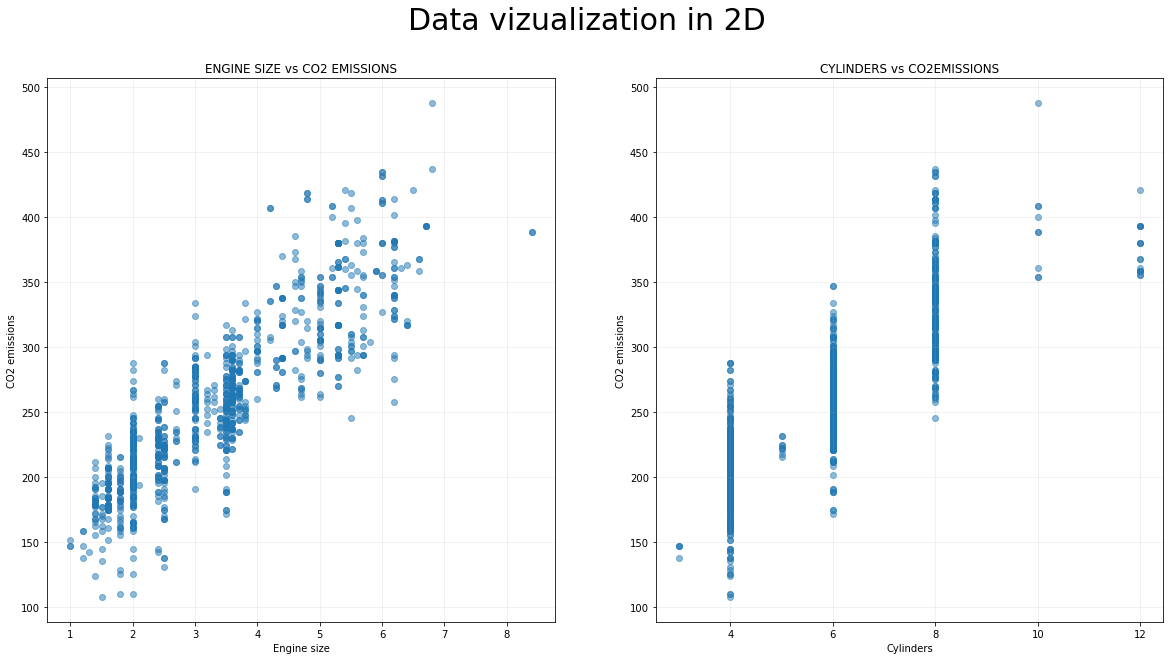

In [190]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.suptitle("Data vizualization in 2D", fontsize=30)

ax1.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"],alpha=0.5)
ax1.set_title("ENGINE SIZE vs CO2 EMISSIONS")
ax1.set_xlabel("Engine size")
ax1.set_ylabel("CO2 emissions")
ax1.grid(alpha=0.2)

ax2.scatter(data["CYLINDERS"],data["CO2EMISSIONS"],alpha=0.5)
ax2.set_title("CYLINDERS vs CO2EMISSIONS")
ax2.set_xlabel("Cylinders")
ax2.set_ylabel("CO2 emissions")
ax2.grid(alpha=0.2)

plt.show()

We see that Engine size vs Co2 emissions has a tendency to be linear, this is almost the same if we match Cylinders vs CO2 emission, but in the first case could be a better aproximation

<h2 id="reading_data">Visualize the data in 3D</h2>

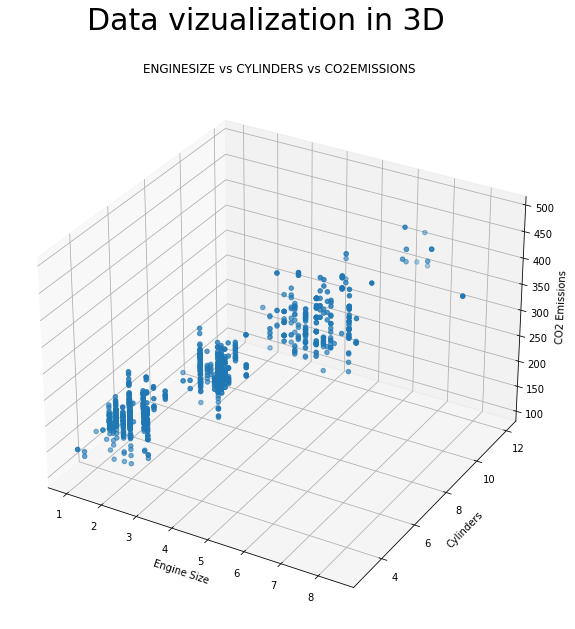

In [191]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Data vizualization in 3D", fontsize=30)
ax = fig.add_subplot(projection="3d")
ax.scatter(data["ENGINESIZE"],data["CYLINDERS"],data["CO2EMISSIONS"])
ax.set_xlabel("Engine Size")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions")
ax.set_title("ENGINESIZE vs CYLINDERS vs CO2EMISSIONS")

plt.show()

This also shows that if we match the 3 features, the model will keep being a linear tendensy

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [192]:
def feature_scaling(data,switch):
    data2 = data 
    if switch & any(data2 == data):
        data2 = (data2 - data2.mean())/(data2.std())
        return data2
    elif switch & any(data2 != data):
        return data2
    else:
        return data


You have to make another variable like "data2", to manteing the previous import, turning switch to True will normalize the data, False will give the same dataset

In [193]:
data2 = feature_scaling(data,True)

we are going to work with the data unnormalize

# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train,X_test,y_train,y_test = train_test_split(data[X_data],data[y_data], test_size=0.2,random_state=1) 
print("X Train:", X_train.shape)
print("y Train:", y_train.shape)
print("X Test:", X_test.shape)
print("y Test:", y_test.shape)

X Train: (853, 6)
y Train: (853, 1)
X Test: (214, 6)
y Test: (214, 1)


853 (80%) + 214 (20%)= 1067 (100% lenght data)

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [196]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [197]:
R2 = model.score(X_test,y_test)
print("R2 score:", R2)

R2 score: 0.8880748726329645


we will compare this result in the last part

<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [198]:
ten_cars = X_test.sample(n=10) # run again to take other 10 random cars

we take 10 diferent cars from the list om X_test

In [199]:
y_predicted = model.predict(ten_cars)
for i in range(10):
    print("*Car number:", i+1)
    print(ten_cars.iloc[i].reset_index())
    print("-----CO2 prediction: ",round(y_predicted[i][0],2),"\n")

*Car number: 1
                      index     3
0                ENGINESIZE   3.5
1                 CYLINDERS   6.0
2      FUELCONSUMPTION_CITY  12.7
3       FUELCONSUMPTION_HWY   9.1
4      FUELCONSUMPTION_COMB  11.1
5  FUELCONSUMPTION_COMB_MPG  25.0
-----CO2 prediction:  264.22 

*Car number: 2
                      index   331
0                ENGINESIZE   3.6
1                 CYLINDERS   6.0
2      FUELCONSUMPTION_CITY  18.9
3       FUELCONSUMPTION_HWY  12.9
4      FUELCONSUMPTION_COMB  16.2
5  FUELCONSUMPTION_COMB_MPG  17.0
-----CO2 prediction:  307.72 

*Car number: 3
                      index   523
0                ENGINESIZE   1.6
1                 CYLINDERS   4.0
2      FUELCONSUMPTION_CITY   9.1
3       FUELCONSUMPTION_HWY   6.7
4      FUELCONSUMPTION_COMB   8.0
5  FUELCONSUMPTION_COMB_MPG  35.0
-----CO2 prediction:  184.31 

*Car number: 4
                      index   202
0                ENGINESIZE   1.4
1                 CYLINDERS   4.0
2      FUELCONSUMPTION_CITY   9

We can show how the data can be compared in each car and see if what could be the important feature that will increse the C02 production. as a first look, this could be determinated by the Fuelconsumption_comb that with small changes can increase a lot the C02 production

<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [200]:
def MAE(y,y_predicted):
    return np.mean(np.abs(y- y_predicted))

def MAPE(y,y_predicted):
    return 100*np.mean(np.abs( ((y-y_predicted)/(y)) ))

In [201]:
y_predicted	= model.predict(X_test)
mae = MAE(y_test,y_predicted)
mape = MAPE(y_test,y_predicted)

In [202]:
print("Mean absolute error (MAE):", round(mae[0],2))
print("Mean absolute percentage error (MAPE):", round(mape[0],2))
print("R-squared/R2-score:",round(R2,2))

Mean absolute error (MAE): 14.26
Mean absolute percentage error (MAPE): 5.23
R-squared/R2-score: 0.89


## Compare with a single feature

In [203]:
X_data2 = ["ENGINESIZE"]
y_data2 = ["CO2EMISSIONS"]

In [204]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(data[X_data2],data[y_data2], test_size=0.2,random_state=1) 
print("X Train:", X_train2.shape)
print("y Train:", y_train2.shape)
print("X Test:", X_test2.shape)
print("y Test:", y_test2.shape)

X Train: (853, 1)
y Train: (853, 1)
X Test: (214, 1)
y Test: (214, 1)


In [205]:
model2 = LinearRegression()
model2.fit(X_train2,y_train2)

LinearRegression()

In [220]:
print("model 1 parameters:", [model.coef_[0].tolist(), model.intercept_[0]])
print("model 2 parameters:", [model2.coef_[0].tolist(), model2.intercept_[0]])


model 1 parameters: [[9.593723158580282, 6.992938831186918, -13.505055442578392, -6.333558497999765, 23.33534572296619, -3.9169779600291084], 256.73250739850846]
model 2 parameters: [[39.41537459753921], 124.770595231584]


In [224]:
y_predicted2 = model2.predict(X_test2)
mae = MAE(y_test2,y_predicted2)
mape = MAPE(y_test2,y_predicted2)
R22 = model2.score(X_test2,y_test2)

In [225]:
print("Mean absolute error (MAE):", round(mae[0],2))
print("Mean absolute percentage error (MAPE):", round(mape[0],2))
print("R-squared/R2-score:",round(R22,2))

Mean absolute error (MAE): 23.21
Mean absolute percentage error (MAPE): 9.3
R-squared/R2-score: 0.76


We can compare the two models (first with 6 elements in X, and the second with 1 element in X), we see that MAE will increase in the second model because is inaccured again the other one, that why R2 will decrease in the second model, that why its better to take a multi linear regression and also its necesary to see that I also take the column FUELCONSUMPTION_COMB_MPG, this column improve the results.